# Introduction

In [2]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import bk.load
import bk.compute
import bk.plot
import bk.signal

import scipy as sp

%matplotlib inline

In [3]:
bk.load.current_session_linux(base_folder= '/home/billel/Data/GG-Dataset/')

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713


True

In [4]:
print('Rat : ',bk.load.rat)
print('Day : ',bk.load.day)
print('Path : ',bk.load.path)
print('Name of session : ', bk.load.session)

Rat :  8
Day :  6
Path :  /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713
Name of session :  Rat08-20130713


# LFPs

## Load LFP / Filter LFP

In [7]:
lfp = bk.load.lfp(23,0,50)

NameError: name 'states' is not defined

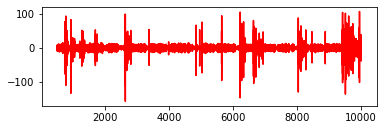

In [8]:
lfp_hpc = bk.load.lfp(23,500,10_000)
lfp_bla = bk.load.lfp(121,500,10_000)

filt_lfp_hpc = bk.signal.passband(lfp_hpc,100,300)
filt_lfp_bla = bk.signal.passband(lfp_bla,100,300)

ax = plt.subplot(2,1,1)
# plt.plot(lfp_hpc.as_units('s'),color = 'grey',alpha = 0.5)
hpc_zscore = sp.stats.zscore(filt_lfp_hpc.values)
bla_zscore = sp.stats.zscore(filt_lfp_bla.values)
plt.plot(filt_lfp_hpc.as_units('s').index,hpc_zscore,color = 'r')
bk.plot.intervals(states['sws'])



plt.subplot(2,1,2,sharex=ax)
# plt.plot(lfp_bla.as_units('s'),color = 'grey',alpha = 0.5)
plt.plot(filt_lfp_bla.as_units('s').index,bla_zscore,color = 'r')
bk.plot.intervals(states['sws'])

## PowerSpectrum / PowerSpectrograms

In [ ]:
lfp_hpc = bk.load.lfp(0,20000,166,101)

In [ ]:
states = bk.load.states()

lfp_rem = lfp_hpc.restrict(states['Rem'])
lfp_sws = lfp_hpc.restrict(states['sws'])

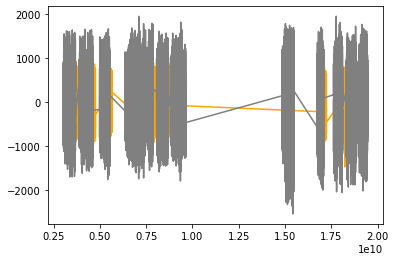

In [ ]:
plt.plot(lfp_rem,'orange')
plt.plot(lfp_sws,'grey')

(0.0, 100.0)

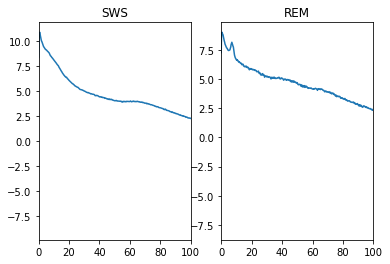

In [181]:
f,power_sws = sp.signal.welch(lfp_sws,1250,nperseg = 5000, noverlap=2500)
f,power_rem = sp.signal.welch(lfp_rem,1250,nperseg = 5000, noverlap=2500)

plt.subplot(1,2,1)
plt.title('SWS')
plt.plot(f,np.log(power_sws))
plt.xlim(0,100)

plt.subplot(1,2,2)
plt.title('REM')
plt.plot(f,np.log(power_rem))
plt.xlim(0,100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


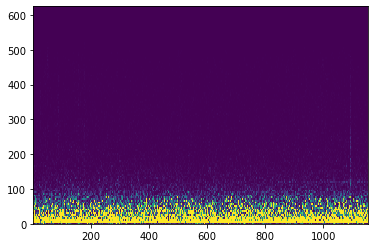

In [183]:
f,t,sxx = sp.signal.spectrogram(lfp_rem,1250,nperseg=250,noverlap=125)
plt.pcolormesh(t,f,sxx)
plt.clim(0,200)

# Spikes and Neurons


In [6]:
neurons,metadata = bk.load.spikes()

Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


In [18]:
neurons[2].as_units('s').index.values

array([2.05050000e-01, 2.51665000e+00, 5.64450000e+00, ...,
       2.26777221e+04, 2.26777948e+04, 2.26779113e+04])

In [ ]:
pd.__version__

'1.2.4'

In [23]:
neurons[0].as_units('s')

Time (s)
24.42490      NaN
82.58885      NaN
101.86240     NaN
138.35750     NaN
138.65065     NaN
               ..
22663.57715   NaN
22672.92575   NaN
22675.11920   NaN
22675.61620   NaN
22676.91705   NaN
Length: 15784, dtype: float64

In [24]:
np.ones(len(neurons[0]))

array([1., 1., 1., ..., 1., 1., 1.])

In [20]:
y = np.ones(len(neurons[0]))

In [31]:
states = bk.load.states()

In [35]:
t,binned = bk.compute.binSpikes(neurons[0:15])

In [37]:
plt.imshow(binned,aspect = 'auto',interpolation='None')

In [52]:
corr = np.corrcoef(binned)

In [56]:
metadata[metadata['Type'] == 'Int']

,Rat,Day,Shank,Id,Region,Type
14,8,6,2,15,Hpc,Int
16,8,6,2,17,Hpc,Int
18,8,6,2,19,Hpc,Int
44,8,6,3,27,Hpc,Int
51,8,6,4,8,Hpc,Int
60,8,6,5,2,BLA,Int
61,8,6,5,3,BLA,Int
83,8,6,6,11,BLA,Int
84,8,6,7,2,BLA,Int
85,8,6,7,3,BLA,Int


In [53]:
plt.imshow(corr)

In [42]:
for i in range(len(corr)): corr[i,i] = np.nan

In [48]:
plt.imshow(corr)

In [51]:
metadata

,Rat,Day,Shank,Id,Region,Type
0,8,6,1,2,Hpc,Pyr
1,8,6,2,2,Hpc,Pyr
2,8,6,2,3,Hpc,Pyr
3,8,6,2,4,Hpc,Pyr
4,8,6,2,5,Hpc,Pyr
...,...,...,...,...,...,...
247,8,6,19,2,BLA,Pyr
248,8,6,19,3,BLA,Pyr
249,8,6,19,4,BLA,Pyr
250,8,6,19,5,BLA,Pyr


In [50]:
neurons[0].as_units('s')

Time (s)
24.42490      NaN
82.58885      NaN
101.86240     NaN
138.35750     NaN
138.65065     NaN
               ..
22663.57715   NaN
22672.92575   NaN
22675.11920   NaN
22675.61620   NaN
22676.91705   NaN
Length: 15784, dtype: float64

In [34]:
for i in range(15):
    y = np.ones(len(neurons[i]))*i
    plt.plot(neurons[i].as_units('s').index,y,'|')

bk.plot.intervals(states['Rem'])
bk.plot.intervals(states['sws'],col = 'grey')

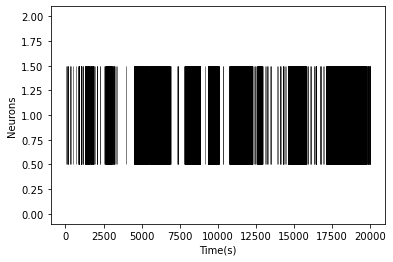

In [16]:
bk.plot.rasterPlot([neurons[0]],np.array([[0,20000]]))

# Behavior

In [17]:
pos = bk.load.pos()

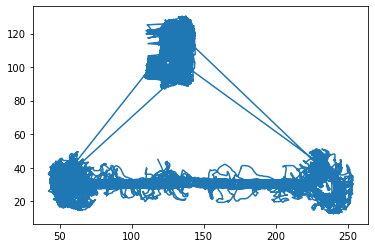

In [18]:
plt.plot(pos['x'],pos['y'])

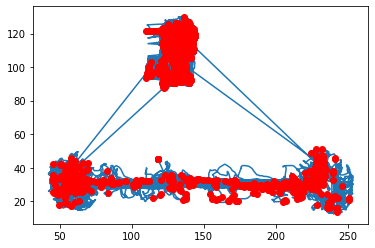

In [19]:
plt.figure()
pos_when_spike = pos.realign(neurons[13])
plt.plot(pos['x'],pos['y'])
plt.plot(pos_when_spike.as_units('s')['x'],pos_when_spike.as_units('s')['y'],'ro')

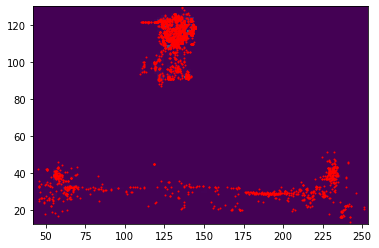

In [20]:
plt.figure()
plt.hist2d(pos['x'],pos['y'],bins = 100)
plt.plot(pos_when_spike.as_units('s')['x'],pos_when_spike.as_units('s')['y'],'ro',markersize = 1)

In [21]:
neurons[0].realign(pos).as_units('s')

Time (s)
9.0880       NaN
9.1136       NaN
9.1392       NaN
9.1648       NaN
9.1904       NaN
              ..
22679.8848   NaN
22679.9104   NaN
22679.9360   NaN
22679.9616   NaN
22679.9872   NaN
Length: 885173, dtype: float64

# Batching

# Conclusion